In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [4]:
R = Runner(verbose=True, classifier='unetplus')

*** GP2 ***
Working directory: /tmp/tmpu59_mbn3GP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images.shape

(10000, 512, 512, 1)

In [7]:
masks.shape

(10000, 512, 512, 1)

In [8]:
print(images.max())

255


In [9]:
print(images.min())

0


In [10]:
print(masks.max())

True


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [13]:
RUNS = 5

In [14]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
8/8 [==============================] - 28s 2s/step - loss: 0.8839 - binary_accuracy: 0.4799 - val_loss: 0.5885 - val_binary_accuracy: 0.7524
Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 0.8671 - binary_accuracy: 0.4867 - val_loss: 0.6448 - val_binary_accuracy: 0.6065
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 0.8516 - binary_accuracy: 0.4932 - val_loss: 0.6774 - val_binary_accuracy: 0.5080
Epoch 4/100
8/8 [==============================] - 10s 1s/step - loss: 0.8370 - binary_accuracy: 0.4996 - val_loss: 0.6964 - val_binary_accuracy: 0.4597
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 0.8227 - binary_accuracy: 0.5068 - val_loss: 0.7070 - val_binary_accuracy: 0.4659
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 0.8084 - binary_accuracy: 0.5147 - val_loss: 0.7106 - val_binary_accuracy: 0.5215
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 

8/8 [==============================] - 10s 1s/step - loss: 0.2284 - binary_accuracy: 0.9866 - val_loss: 3.9663 - val_binary_accuracy: 0.5110
Epoch 55/100
8/8 [==============================] - 10s 1s/step - loss: 0.2221 - binary_accuracy: 0.9866 - val_loss: 2.1583 - val_binary_accuracy: 0.7118
Epoch 56/100
8/8 [==============================] - 10s 1s/step - loss: 0.2153 - binary_accuracy: 0.9870 - val_loss: 4.1342 - val_binary_accuracy: 0.5556
Epoch 57/100
8/8 [==============================] - 10s 1s/step - loss: 0.2087 - binary_accuracy: 0.9868 - val_loss: 4.0653 - val_binary_accuracy: 0.5406
Epoch 58/100
8/8 [==============================] - 10s 1s/step - loss: 0.2024 - binary_accuracy: 0.9865 - val_loss: 5.7774 - val_binary_accuracy: 0.4456
Epoch 59/100
8/8 [==============================] - 10s 1s/step - loss: 0.1942 - binary_accuracy: 0.9869 - val_loss: 6.6754 - val_binary_accuracy: 0.4037
Epoch 60/100
8/8 [==============================] - 10s 1s/step - loss: 0.1882 - binary_a

D_ids ['6a1aad48-b3df-4bb4-a565-0f56cee20b86', 'a624eba8-8f3c-4794-b378-c314c5145385', '170806a7-1fb5-4700-a916-e71a78a12d3b', '87961aa3-21ed-4ccd-9066-285b8b248515', '0f4f6390-9f99-43f6-8b77-037256b7ef1f', '8465e61b-80af-4bd0-8345-7b23f28147cf', 'a5f7d145-9ebe-4a79-b0ae-28b65df48f14', '7daa837d-f43d-44f6-b272-bfadb3d0c566', 'dbf6851c-6b3a-47f9-a96e-41f75147e608', 'a2b64253-fb48-4dd0-9ad3-8afd312cde39', '06657c16-63e2-4187-93df-4927cb10d3e7', '2fae0f5f-b7ba-4283-b083-a11636625a18', '80302dd0-31f9-45fa-8c28-09209db882dd', '8de0ebe8-3af0-44da-bd8d-285fbb6732be', '7827620f-473c-4b31-8ca2-e2b0b611c70e', '3b7f4899-c4c0-40af-95b2-d5d35905e3ea', '96193baf-0cfb-483a-b34e-b87fe33129bf', 'bf5148d1-2117-4bc8-a132-cff5b35030e4', 'f3877fc3-70f8-43c6-ada9-989d1f8a5e8f', '5a8cb76b-15af-4d61-ad75-8e914e899953', '62303894-e6df-411f-af6c-2e17afcc5045', '2f143b90-1a7b-49e7-8d62-7281675f8b06', 'b501fcf7-38db-4399-8e01-022ed7b61302', '34b2290a-adaf-4444-96df-3effe3273340', 'bd92579b-e9e5-4ceb-8693-430c289b

Epoch 1/100
10/10 [==============================] - 15s 2s/step - loss: 0.0971 - binary_accuracy: 0.9897 - val_loss: 1.2906 - val_binary_accuracy: 0.8213
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.0962 - binary_accuracy: 0.9897 - val_loss: 0.1494 - val_binary_accuracy: 0.9726
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.1100 - binary_accuracy: 0.9855 - val_loss: 0.8778 - val_binary_accuracy: 0.8327
Epoch 4/100
10/10 [==============================] - 11s 1s/step - loss: 0.0955 - binary_accuracy: 0.9895 - val_loss: 2.3580 - val_binary_accuracy: 0.7348
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.0949 - binary_accuracy: 0.9892 - val_loss: 0.2162 - val_binary_accuracy: 0.9625
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.0941 - binary_accuracy: 0.9892 - val_loss: 0.1743 - val_binary_accuracy: 0.9694
Epoch 7/100
10/10 [==============================] - 11s 1s/step - los

Replacing 58 from 175 !
D_relabeled_ 58
selected_ids ['2d350b55-9235-4dec-bfc7-08c3bce8a744', '7e58e23b-f107-4e7b-ba5c-c54bba9cf380', 'a5f296af-c1b6-41ee-99c2-8987c37a7abf', 'd6dbb13e-6ae0-4b6b-8034-b178ec7c0cdd', '7036ba74-57e8-4ecd-af01-f51ec8757c44', '62b0e35f-8f75-4409-b97b-65c60bf29ac1', 'a40af113-569e-4859-89ea-e16c02e26f45', '35d34675-21b0-4d3f-b4ef-69cd3cb89645', '535f52ab-43a6-40bc-a94e-b96854462976', '336b2c57-01c0-4826-bd91-9222dcda5547', '07ea40e0-3a05-4c8d-8d9b-d50920265c91', 'aa6bedc0-6bdd-4fd5-96e0-2690933c803d', '1aef17ee-bfb1-4b05-a1bb-8e22f2ff9ee8', '50f99fb1-a7d1-4c30-8f60-00cd80ee0c76', 'fa228281-91f3-40c5-ac9a-f8c3b8ff137e', '4b3ddc19-b64b-4188-9f1f-843a148861b4', '7bd1d251-616b-4e5c-bbce-9297b1f0de8f', '13db921b-f517-4a3e-9191-81a8f57c222c', '6476e419-b383-406f-8a6e-13c72fa2974f', 'b891adf0-4071-413e-b697-b2cd9eb7d5d5', '7d578db8-15c5-4570-8ab7-0d397f8ba34e', 'e11c57b8-4700-49ec-b57c-1ea7ae00a2f7', 'd6f00784-4510-4f42-879d-c9a34ce5633c', '53ab341d-bebd-4270-8fe9-7

Model saved to: /tmp/tmpu59_mbn3GP2/kunet_2model
History saved to: /tmp/tmpu59_mbn3GP2/khistory_2.pkl
Testing the classifier...
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 6.6638 - accuracy: 0.8033
Found 181 machine labels.
Machine labels [  2   6   7   8  11  12  16  18  26  27  28  32  33  35  39  40  41  43
  53  62  65  67  70  73  74  75  77  78  79  80  83  87  89  91  96 102
 105 107 114 117 119 123 124 130 133 135 138 140 141 156 163 172 175 176
 177 178 180 182 183 185 186 188 193 196 206 209 210 214 230 237 238 240
 245 248 249 252 255 257 258 260 264 267 268 269 274 276 286 288 291 297
 298 300 303 306 313 314 316 319 321 322 324 328 330 331 332 340 342 343
 344 349 353 356 358 359 363 366 370 375 377 379 380 392 393 400 406 408
 417 419 420 424 425 426 427 441 445 446 447 453 459 472 477 478 479 481
 482 485 489 493 495 497 501 502 508 509 515 517 518 519 521 525 529 534
 537 544 550 552 554 555 557 559 563 564 566 570 571 576 

Epoch 1/100
12/12 [==============================] - 16s 1s/step - loss: 0.0518 - binary_accuracy: 0.9912 - val_loss: 0.0602 - val_binary_accuracy: 0.9895
Epoch 2/100
12/12 [==============================] - 13s 1s/step - loss: 0.0508 - binary_accuracy: 0.9913 - val_loss: 0.0558 - val_binary_accuracy: 0.9895
Epoch 3/100
12/12 [==============================] - 13s 1s/step - loss: 0.0503 - binary_accuracy: 0.9914 - val_loss: 0.0516 - val_binary_accuracy: 0.9903
Epoch 4/100
12/12 [==============================] - 13s 1s/step - loss: 0.0495 - binary_accuracy: 0.9915 - val_loss: 0.0491 - val_binary_accuracy: 0.9907
Epoch 5/100
12/12 [==============================] - 13s 1s/step - loss: 0.0488 - binary_accuracy: 0.9916 - val_loss: 0.0499 - val_binary_accuracy: 0.9906
Epoch 6/100
12/12 [==============================] - 13s 1s/step - loss: 0.0483 - binary_accuracy: 0.9917 - val_loss: 0.0476 - val_binary_accuracy: 0.9908
Epoch 7/100
12/12 [==============================] - 13s 1s/step - los

Replacing 62 from 187 !
D_relabeled_ 62
selected_ids ['074b9b62-5b9e-4369-b64d-10991103636a', 'db8e65e7-bf06-420b-b6a7-dcca85cd1366', '34e0997f-f602-4395-9665-acf0f2d7a87e', '4c83011a-3090-4a90-892a-42859e7f6971', '05b9bead-02fa-4b69-a57e-8860441eb0bb', 'a7c320b6-e372-4288-94e7-b974e69850bf', '2410e7c0-9163-4ed7-aa56-4c5455f7a977', '49d280b7-c1dd-48dc-bbcc-2bc5cfd8bfb1', '6ef7c6bf-2920-4ae1-922c-8d713e3bca48', '182d4016-e924-4f54-84d4-88d76246a5a6', '89301344-f183-4938-b5aa-bd7be23dc543', '0f00aa12-b43f-48ca-bd43-dc172fce7386', 'bf18087b-9d7b-4064-b37a-e3f673740d65', '5f46fec2-045f-461f-b335-33ec9c49083d', 'd608f3dd-54b1-4acf-97bc-b6a18c7785ac', '7dfbca1a-f6c4-4842-b30e-60cd6edb4fa7', '8f378c20-080b-4ed4-9ccf-6769207f95dd', '9ac04623-d60a-4489-b616-e9b44c77403e', 'f1aad85c-b8fe-4978-9fee-b1fe7b8cf042', 'bfae16de-9727-43c1-9e97-12b4fcd61fc4', 'c95e98af-3d18-4b1e-94ce-bc48768d3458', 'c0b2c970-4bfb-4012-ac53-ab83c064c5f9', '36b389af-13d1-41fe-affc-cfb6b29afa4b', '09331ffe-2e11-49b0-bb81-b

Replacing 69 from 208 !
D_relabeled_ 69
selected_ids ['736e4d26-422d-4ce1-9b9b-831252483444', 'ddf3e125-3ccb-4765-8ca4-97504ceed729', '05c55d0e-0d6c-4fe5-a62b-413ca42bd701', 'a3607dda-b87e-4e31-bb3c-ffedb9caa1fe', 'b30160a7-0a7f-4e77-9a45-1b7ffddc9fac', '083be25b-cf88-4aad-b52c-c04be4fa7209', '6cdd5c70-f8b4-4cb8-8cc6-46a817da5288', '27f08a85-4ab6-474b-a5d2-4cfc02a87915', '4b396fef-e38f-4b50-b0f7-2918599936bb', '989ce22e-f143-4823-a970-69f47b3bc51b', '418b2e04-be71-4815-b6a0-6cbaca222d69', 'b025fcdf-051c-4a3b-af47-9a7c9704a691', 'e637901a-c9cb-48e9-8c18-52c8a6eba2a3', 'b4617202-a704-4066-b95a-8e374b4dd108', 'dd9ce187-2e4b-4389-acec-8f2b155f3469', '7fa606a6-c01d-4bf3-9809-df7d1ebb6d59', '513d0371-daaa-4159-bafa-b9f57aac065c', '46806de0-886f-46ce-bdf3-9114c5bac4dc', '55d2662d-4006-4237-a0e0-aee60e1a8abb', 'de8e62bc-4768-405b-80fb-238b051dada9', '8ffa1b9f-6cf3-492d-bcd9-757c3e9c4b54', 'bdc761d2-a84c-4692-954e-26bdf2cdef52', '3a89d93f-a152-4ae7-8377-185f7bab5db3', '14316e5b-fa9e-489f-8068-5

In [15]:
R.classifier_scores

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[[1.1124359369277954, 0.8264666199684143],
 [0.7074126601219177, 0.9087710976600647],
 [0.06491487473249435, 0.9890620112419128],
 [0.049878668040037155, 0.9902140498161316],
 [1.157025694847107, 0.811139702796936]]

In [16]:
R.discriminator_scores

[[0.10572871565818787, 0.9900000095367432],
 [7.015192031860352, 0.8100000023841858],
 [6.663753986358643, 0.8033333420753479],
 [7.486493110656738, 0.7983333468437195],
 [6.243584156036377, 0.8383333086967468]]

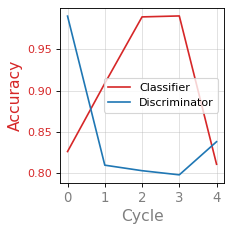

In [17]:
R.plot()